In [1]:

%load_ext autoreload
%autoreload 2

import numpy as np
from matplotlib import pyplot as plt

from dataclasses import dataclass
import numpy as np
import plotly.graph_objects as go

import rf_network as rn
import notebook_tools as nt

In [2]:
nodes = rn.create_nodes_samples(rn.NodesDistributionParams())


nt.figure_visualize_nodes(nodes)





In [3]:
nodes = rn.create_nodes_samples(rn.NodesDistributionParams())


fig=nt.figure_visualize_nodes(nodes)
rn.update_nodes_location(nodes,60)
fig=nt.figure_visualize_nodes(nodes,fig,nodes_color='red',edges_color='red')
rn.update_nodes_location(nodes,60)
fig=nt.figure_visualize_nodes(nodes,fig,nodes_color='green',edges_color='green')
fig.show()



In [4]:
#import plotly.io as pio
#pio.kaleido.scope.mathjax=None
#img_bytes=pio.to_image(fig,format='png',width= 1920,height = 1080)


#img_np = np.array(Image.open(io.BytesIO(img_bytes)))

In [8]:
from network_simulator import NetworkSimulator

sim = NetworkSimulator(simulation_rate=10)
sim.step()


fig = go.Figure()

nt.visualize_nodes(nodes,fig,'blue')
nt.visualize_cmatrix(nodes,sim.current_connectivity,fig,reported_cmatrix=sim.reported_connectivity)
    # Update the layout
fig.update_layout(
    title='Nodes',
    xaxis_title='km',
    yaxis_title='km',
    width=1000,
    height=1000
    )

    
    

In [6]:
import scipy.ndimage as ndimage



def generate_terrain_height_map(size, max_elevation, smoothness):
    """
    Generates a randomized terrain height map for a rural area.

    Args:
        size (tuple): Size of the height map (rows, columns).
        max_elevation (float): Maximum elevation value for the terrain.
        smoothness (float): Controls the smoothness of the terrain. Higher values result in smoother terrain.

    Returns:
        numpy.ndarray: 2D array representing the terrain height map.
    """
    # Generate a random noise map
    noise_map = np.random.uniform(low=0.0, high=1.0, size=size)

    # Smooth the noise map using a Gaussian filter
    smoothed_map = ndimage.gaussian_filter(noise_map, sigma=smoothness)

    # Normalize the smoothed map to the desired elevation range
    normalized_map = max_elevation * (smoothed_map - np.min(smoothed_map)) / (np.max(smoothed_map) - np.min(smoothed_map))

    return normalized_map

ModuleNotFoundError: No module named 'scipy'

In [ ]:
x = generate_terrain_height_map((1000,1000),150,10)

In [ ]:
import matplotlib.pyplot as plt

def visualize_terrain_height_map(terrain_height_map):
    """
    Visualizes a terrain height map.

    Args:
        terrain_height_map (numpy.ndarray): 2D array representing the terrain height map.
    """
    plt.figure(figsize=(8, 6))
    plt.imshow(terrain_height_map, cmap='terrain', origin='lower')
    plt.colorbar(label='Elevation (m)')
    plt.xlabel('Columns')
    plt.ylabel('Rows')
    plt.title('Terrain Height Map')
    plt.show()

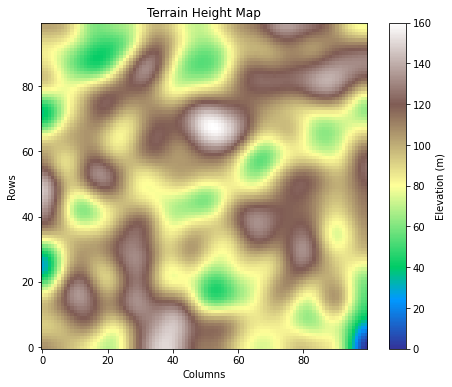

In [ ]:
terrain_map = generate_terrain_height_map(size=(100, 100), max_elevation=160, smoothness=5)
visualize_terrain_height_map(terrain_map)